In [1]:
from sklearn import manifold, datasets
from sklearn import decomposition
from sklearn.manifold import TSNE
from math import *
import plotly.graph_objs as go
import plotly
import pandas as pd
import numpy as np

n_points = 10000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2


In [2]:
df = pd.DataFrame(X, columns =['1','2','3'])

In [6]:
## Run PCA to get 2d
X_tsne = TSNE(n_components=2).fit_transform(X)


In [4]:
##spiral lines
sx = []
sz = []
for i in range(100):
    t = i / 20 * pi
    sx.append((1  * t) * cos(t))
    sz.append((1  * t) * sin(t))
sy=[5]*len(sx)

In [10]:
trace1 = go.Scatter3d(x=df['1'], y=df['2'], z=df['3'], 
                      mode='markers',
                      marker=dict(size=1, color =color),
                     )

trace2 = go.Scatter3d(x=sx[32:91], y=sy[32:91], z=sz[32:91], mode = 'lines', 
                          line = dict(color = 'rgb(80, 12, 240)', width= 5))

trace3 = go.Scatter3d(x=[5.59124,10.67473], 
                      y=[5,5], 
                      z=[4.06248, 7.755644], mode = 'lines',
                      line = dict(color = 'rgb(200, 12, 20)', width= 5, dash='dash'))

axis1 = go.Scatter3d(x=[-11,15], 
                      y=[0,0], 
                      z=[-10, -10], mode = 'lines',
                     line = dict(color = 'rgb(0, 0, 0)', width= 1))

axis2 = go.Scatter3d(x=[-10,-10], 
                      y=[-1,23], 
                      z=[-10, -10], mode = 'lines',
                     line = dict(color = 'rgb(0, 0, 0)', width= 1))


axis3 = go.Scatter3d(x=[-10,-10], 
                      y=[0,0], 
                      z=[-11,15], mode = 'lines',
                     line = dict(color = 'rgb(0, 0, 0)', width= 1))

fig = go.Figure(data=[trace1, trace2, trace3, axis1, axis2, axis3])



fig.update_layout(width=100,height=90, margin=dict(r=10, l=10, b=10, t=10))
fig.update_layout(scene = dict(
                    xaxis = dict(backgroundcolor="rgb(255, 255, 255)",
                                visible= False,
                                zerolinecolor="black"),
                    yaxis = dict(backgroundcolor="rgb(255, 255, 255)",
                                visible= False,),
                    zaxis = dict(backgroundcolor="rgb(255, 255, 255)",
                                visible= False,),
                            )

                 )


#fig.write_html("s_roll.html")
fig.show()

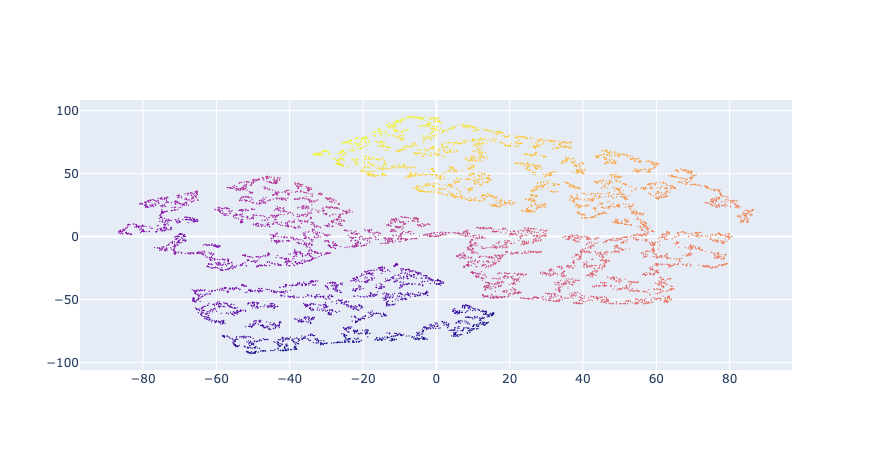

In [16]:
df_tsne = pd.DataFrame(X_tsne, columns =['1','2'])

tsne_trace = go.Scatter(x=df_tsne['1'], y=df_tsne['2'], 
                      mode='markers',
                      marker=dict(size=1, color =color),
                     )
fig = go.Figure(data=[tsne_trace])
fig.show()

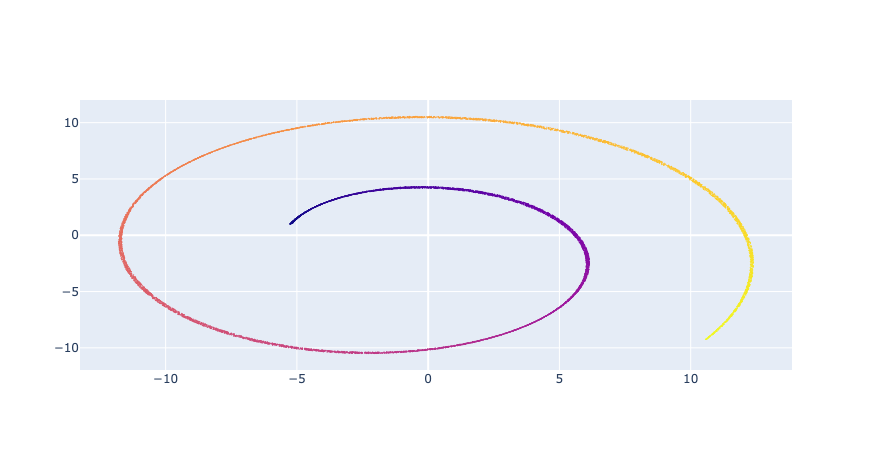

In [18]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns =['1','2'])

pca_trace = go.Scatter(x=df_pca['1'], y=df_pca['2'], 
                      mode='markers',
                      marker=dict(size=1, color =color),
                     )
fig = go.Figure(data=[pca_trace])
fig.show()